In [2]:
#import thu vien
import pandas as pd
import numpy as np
import 

In [7]:
#import data
df = pd.read_csv('/Users/binh230901/Desktop/DA/project/phan_tich_du_lieu_giao_dich_nh/S2_DataFile(2).csv')
df.head(100)

,BRANCH_ID,CHANNEL_ID,AMOUNT,TRAN_TYPE,TRAN_TIME
0,BR0001,MOBILE,3020080,BOOKING ORDER,12/01/2019 1:11
1,BR0002,ATM,2001100,CASH TRANSACTIONS,12/01/2019 11:01
2,BR0004,MOBILE,2140140,BOOKING ORDER,12/01/2019 1:11
3,BR0002,INTERNET,4293000,FINANCIAL POSTING,12/01/2019 6:50
4,BR0003,MOBILE,3046430,BOOKING ORDER,12/01/2019 1:11
...,...,...,...,...,...
95,BR0002,INTERNET,276000,FINANCIAL POSTING,12/01/2019 7:34
96,BR0002,INTERNET,380000,FINANCIAL POSTING,12/01/2019 8:37
97,BR0002,INTERNET,116000,FINANCIAL POSTING,12/01/2019 8:42
98,BR0002,INTERNET,6789839,FINANCIAL POSTING,12/01/2019 9:20


In [8]:
# convert TRAN_TIME to date_time type
df['TRAN_TIME'] = pd.to_datetime(df['TRAN_TIME'], format= '%d/%m/%Y %H:%M')
df

,BRANCH_ID,CHANNEL_ID,AMOUNT,TRAN_TYPE,TRAN_TIME
0,BR0001,MOBILE,3020080,BOOKING ORDER,2019-01-12 01:11:00
1,BR0002,ATM,2001100,CASH TRANSACTIONS,2019-01-12 11:01:00
2,BR0004,MOBILE,2140140,BOOKING ORDER,2019-01-12 01:11:00
3,BR0002,INTERNET,4293000,FINANCIAL POSTING,2019-01-12 06:50:00
4,BR0003,MOBILE,3046430,BOOKING ORDER,2019-01-12 01:11:00
...,...,...,...,...,...
495,BR0050,ATM,200000,CASH TRANSACTIONS,2019-01-12 08:45:00
496,BR0002,MOBILE,100000,FINANCIAL POSTING,2019-04-11 21:13:00
497,BR0002,MOBILE,6259900,FINANCIAL POSTING,2019-01-12 10:53:00
498,BR0002,INTERNET,10000,FINANCIAL POSTING,2019-01-12 08:58:00


In [15]:
# loại bỏ các hàng có amount bé hơn 0
df = df.loc[df['AMOUNT'] > 0]
df

,BRANCH_ID,CHANNEL_ID,AMOUNT,TRAN_TYPE,TRAN_TIME
0,BR0001,MOBILE,3020080,BOOKING ORDER,2019-01-12 01:11:00
1,BR0002,ATM,2001100,CASH TRANSACTIONS,2019-01-12 11:01:00
2,BR0004,MOBILE,2140140,BOOKING ORDER,2019-01-12 01:11:00
3,BR0002,INTERNET,4293000,FINANCIAL POSTING,2019-01-12 06:50:00
4,BR0003,MOBILE,3046430,BOOKING ORDER,2019-01-12 01:11:00
...,...,...,...,...,...
495,BR0050,ATM,200000,CASH TRANSACTIONS,2019-01-12 08:45:00
496,BR0002,MOBILE,100000,FINANCIAL POSTING,2019-04-11 21:13:00
497,BR0002,MOBILE,6259900,FINANCIAL POSTING,2019-01-12 10:53:00
498,BR0002,INTERNET,10000,FINANCIAL POSTING,2019-01-12 08:58:00


In [37]:
# tao ra cot TRAN_HOUR 
df['TRAN_HOUR'] = df['TRAN_TIME'].dt.strftime('%H')


In [39]:
# so giao dich moi gio
df.groupby(['TRAN_HOUR'])['TRAN_HOUR'].count()

TRAN_HOUR
00      2
01    197
02      1
04      1
06     24
07     16
08     45
09     33
10     43
11     24
12     19
13     24
14     20
15      3
20      2
21     28
22     11
23      5
Name: TRAN_HOUR, dtype: int64

In [42]:
# số lượng giao dịch của mỗi kênh giao dịch
df.groupby('CHANNEL_ID')['CHANNEL_ID'].count()

CHANNEL_ID
ATM          98
INTERNET     72
MOBILE      328
Name: CHANNEL_ID, dtype: int64

In [46]:
# số tiền giao dịch trên mỗi kênh
df.groupby('CHANNEL_ID')['AMOUNT'].sum()

CHANNEL_ID
ATM         179502250
INTERNET    768629241
MOBILE      818465352
Name: AMOUNT, dtype: int64

In [47]:
df.groupby('CHANNEL_ID')['AMOUNT'].sum()/df.groupby('CHANNEL_ID')['CHANNEL_ID'].count()

CHANNEL_ID
ATM         1.831656e+06
INTERNET    1.067541e+07
MOBILE      2.495321e+06
dtype: float64

  CHANNEL_ID  SUM_AMT_BY_CHN
0        ATM       179502250
1   INTERNET       768629241
2     MOBILE       818465352
            SUM_AMT_BY_CHN
CHANNEL_ID                
ATM              179502250
INTERNET         768629241
MOBILE           818465352


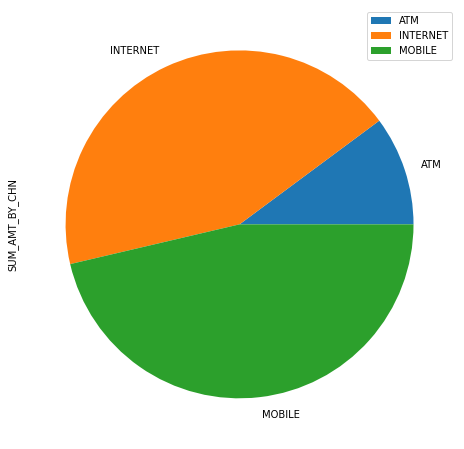

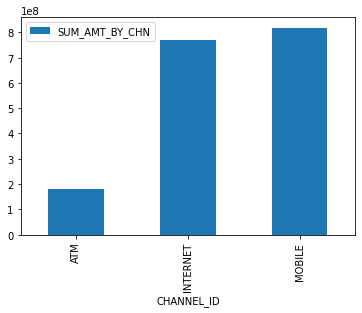

In [62]:
sum_AMT_byChannel = df.groupby(['CHANNEL_ID'])['AMOUNT'].sum().reset_index(name='SUM_AMT_BY_CHN')
print(sum_AMT_byChannel)
df_plot = sum_AMT_byChannel
df_plot = df_plot.set_index('CHANNEL_ID')
print(df_plot)
plot = df_plot.plot.pie(y='SUM_AMT_BY_CHN',subplots=True, figsize=(8, 8))

In [43]:
df

,BRANCH_ID,CHANNEL_ID,AMOUNT,TRAN_TYPE,TRAN_TIME,TRAN_HOUR
0,BR0001,MOBILE,3020080,BOOKING ORDER,2019-01-12 01:11:00,01
1,BR0002,ATM,2001100,CASH TRANSACTIONS,2019-01-12 11:01:00,11
2,BR0004,MOBILE,2140140,BOOKING ORDER,2019-01-12 01:11:00,01
3,BR0002,INTERNET,4293000,FINANCIAL POSTING,2019-01-12 06:50:00,06
4,BR0003,MOBILE,3046430,BOOKING ORDER,2019-01-12 01:11:00,01
...,...,...,...,...,...,...
495,BR0050,ATM,200000,CASH TRANSACTIONS,2019-01-12 08:45:00,08
496,BR0002,MOBILE,100000,FINANCIAL POSTING,2019-04-11 21:13:00,21
497,BR0002,MOBILE,6259900,FINANCIAL POSTING,2019-01-12 10:53:00,10
498,BR0002,INTERNET,10000,FINANCIAL POSTING,2019-01-12 08:58:00,08


In [17]:
df.to_csv('s2_data.csv')